In [1]:
# -*- coding: utf-8 -*-
"""
CNN with KERAS
PRETRAINED MODEL
FINE TUNING
LINK : https://colab.research.google.com/drive/1ZZXnCjFEOkp_KdNcNabd14yok0BAIuwS#forceEdit=true&sandboxMode=true
@author: MohammedS2

"""

'\nCNN with KERAS\nPRETRAINED MODEL\nFINE TUNING\nLINK : https://colab.research.google.com/drive/1m2cg3D1x3j5vrFc-Cu0gMvc48gWyCOuG#forceEdit=true&sandboxMode=true\n@author: MohammedS2\n\n'

In [2]:
""""CNN with KERAS"""
"""
IMPORTS
COLLECTING DATA, CLEANING
PLOT 3D IMG DATA
CNN ARCH/CREATIN MODEL
ANN ARCH
TRAINING
"""

'\nIMPORTS\n'

In [39]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [21]:
(train_set, train_label),(test_set, test_label) = datasets.cifar10.load_data() #Image data, stored in a list of 3dArray, array of objects basically

train_set, test_set = train_set/255.0, test_set/255.0

CLASS_NAMES = ['plane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
train_set.shape

(50000, 32, 32, 3)

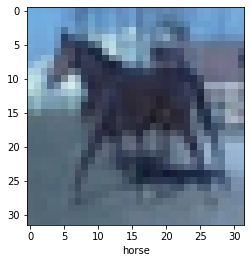

In [22]:
IMG_INDEX = 499

plt.imshow(train_set[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(CLASS_NAMES[train_label[IMG_INDEX][0]]) 
plt.show()

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3) ))
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

#Layer 1
#The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

#Layer 2
#This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

#Other Layers
#The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [30]:
#ANN/Dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [35]:
#TRAINING
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_set, train_label, epochs=10,
                   validation_data=(test_set, test_label))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.5385 - accuracy: 0.4382 - val_loss: 1.2814 - val_accuracy: 0.5324
Epoch 2/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.1451 - accuracy: 0.5956 - val_loss: 1.0773 - val_accuracy: 0.6170
Epoch 3/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.9866 - accuracy: 0.6537 - val_loss: 0.9467 - val_accuracy: 0.6684
Epoch 4/10
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.8893 - accuracy: 0.6890 - val_loss: 0.9418 - val_accuracy: 0.6676
Epoch 5/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 0.8229 - accuracy: 0.7129 - val_loss: 0.8877 - val_accuracy: 0.6927
Epoch 6/10
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.7579 - accuracy: 0.7342 - val_loss: 0.8701 - val_accuracy: 0.7039
Epoch 7/10
50000/50000 [==============================] 

In [36]:
#PREDICTION
pred = model.predict(test_set)


deer


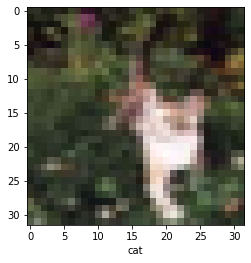

In [45]:
IMG_INDEX = 4545

pred[IMG_INDEX]
print(CLASS_NAMES[np.argmax(pred[IMG_INDEX])])
plt.imshow(test_set[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(CLASS_NAMES[test_label[IMG_INDEX][0]]) 
plt.show()